In [ ]:
all_txns = []

with open('/content/drive/MyDrive/AMA/groceries.csv') as f:
    # Read each line from the file
    content = f.readlines()
    # Remove white space from the beginning and end of each line
    txns = [x.strip() for x in content if x.strip()]  # Ignore empty lines

    # Iterate through each line and create a list of transactions
    for each_txn in txns:
        # Split the transaction items by comma and filter out any empty items
        txn_items = [item for item in each_txn.split(',') if item]
        if txn_items:  # Only append non-empty transactions
            all_txns.append(txn_items)

In [ ]:
all_txns[0:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')

In [ ]:
one_hot_encoding = TransactionEncoder()
# Transform the data into one-hot-encoding format
one_hot_txns = one_hot_encoding.fit(all_txns).transform(all_txns)
# Conver the matrix into the dataframe.
one_hot_txns_df = pd.DataFrame(one_hot_txns,
                               columns=one_hot_encoding.columns_)

In [ ]:
one_hot_txns_df.iloc[5:10, 10:20]

,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles
5,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [ ]:
one_hot_txns_df.shape

(9835, 169)

In [ ]:
len(one_hot_txns_df.columns)

169

In [ ]:
frequent_itemsets = apriori(one_hot_txns_df,
                            min_support=0.02,
                            use_colnames=True)

In [ ]:
frequent_itemsets.sample(10, random_state = 90)

,support,itemsets
60,0.020437,"(bottled beer, whole milk)"
52,0.033859,(sugar)
89,0.035892,"(other vegetables, tropical fruit)"
105,0.021047,"(root vegetables, tropical fruit)"
88,0.032740,"(other vegetables, soda)"
16,0.058058,(coffee)
111,0.024504,"(whole milk, shopping bags)"
36,0.079817,(newspapers)
119,0.056024,"(yogurt, whole milk)"
55,0.071683,(whipped/sour cream)


In [ ]:
rules = association_rules(frequent_itemsets, # itemsets
                          metric="lift",     # lift
                          min_threshold=1, num_itemsets=10)

In [ ]:
rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
87,(yogurt),(rolls/buns),0.139502,0.183935,0.034367,0.246356,1.339363,1.0,0.008708,1.082825,0.294453,0.118888,0.076490,0.216600
27,(other vegetables),(domestic eggs),0.193493,0.063447,0.022267,0.115081,1.813824,1.0,0.009991,1.058350,0.556323,0.094887,0.055133,0.233021
20,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,1.0,0.009355,1.179008,0.334375,0.099108,0.151829,0.243965
10,(yogurt),(bottled water),0.139502,0.110524,0.022979,0.164723,1.490387,1.0,0.007561,1.064888,0.382376,0.101209,0.060934,0.186317
15,(butter),(other vegetables),0.055414,0.193493,0.020031,0.361468,1.868122,1.0,0.009308,1.263065,0.491965,0.087517,0.208275,0.232494


In [ ]:
rules.sort_values('confidence',
                   ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
120,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,1.0,0.011174,1.528340,0.524577,0.080485,0.345695,0.300014
17,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,1.0,0.013395,1.480817,0.514659,0.097237,0.324697,0.302543
24,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,1.0,0.012517,1.461085,0.505984,0.092446,0.315577,0.296363
115,"(other vegetables, root vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,1.0,0.011076,1.457687,0.501524,0.082879,0.313982,0.289999
116,"(whole milk, root vegetables)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,1.0,0.013719,1.533320,0.622230,0.105751,0.347821,0.296912
28,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,1.0,0.013783,1.412030,0.490649,0.103800,0.291800,0.295073
108,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,1.0,0.013916,1.352735,0.465077,0.109273,0.260757,0.287895
91,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,1.0,0.021056,1.350401,0.483202,0.154961,0.259479,0.320049
51,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,1.0,0.026291,1.426693,0.622764,0.185731,0.299078,0.339789
32,(frozen vegetables),(whole milk),0.048094,0.255516,0.020437,0.424947,1.663094,1.0,0.008149,1.294636,0.418855,0.072172,0.227582,0.252466


In [ ]:
rules.sort_values('lift',
                   ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
114,"(other vegetables, whole milk)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,1.0,0.015026,1.290900,0.700572,0.144304,0.225347,0.261235
119,(root vegetables),"(other vegetables, whole milk)",0.108998,0.074835,0.023183,0.212687,2.842082,1.0,0.015026,1.175091,0.727435,0.144304,0.149002,0.261235
70,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,1.0,0.012499,1.226392,0.661650,0.127619,0.184600,0.232464
71,(tropical fruit),(pip fruit),0.104931,0.075648,0.020437,0.194767,2.574648,1.0,0.012499,1.147931,0.683297,0.127619,0.128868,0.232464
117,(other vegetables),"(whole milk, root vegetables)",0.193493,0.048907,0.023183,0.119811,2.449770,1.0,0.013719,1.080555,0.733779,0.105751,0.074550,0.296912
116,"(whole milk, root vegetables)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,1.0,0.013719,1.533320,0.622230,0.105751,0.347821,0.296912
50,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,1.0,0.026291,1.179941,0.688008,0.185731,0.152500,0.339789
51,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,1.0,0.026291,1.426693,0.622764,0.185731,0.299078,0.339789
124,(yogurt),"(other vegetables, whole milk)",0.139502,0.074835,0.022267,0.159621,2.132979,1.0,0.011828,1.100890,0.617284,0.115934,0.091644,0.228588
121,"(other vegetables, whole milk)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,1.0,0.011828,1.225003,0.574138,0.115934,0.183676,0.228588


In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,1.0,0.007845,1.251315,0.389597,0.074113,0.200841,0.244103
1,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,1.0,0.007845,1.033487,0.495856,0.074113,0.032402,0.244103
2,(other vegetables),(bottled water),0.193493,0.110524,0.024809,0.128219,1.160101,1.0,0.003424,1.020297,0.171116,0.088857,0.019894,0.176345
3,(bottled water),(other vegetables),0.110524,0.193493,0.024809,0.224471,1.160101,1.0,0.003424,1.039945,0.155154,0.088857,0.038411,0.176345
4,(rolls/buns),(bottled water),0.183935,0.110524,0.024199,0.131564,1.190373,1.0,0.003870,1.024228,0.195974,0.089541,0.023655,0.175258


In [ ]:
 top10_rules = rules.sort_values(by='confidence', ascending=False).head(10)

In [ ]:
print(top10_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                             antecedents         consequents   support  \
120           (other vegetables, yogurt)        (whole milk)  0.022267   
17                              (butter)        (whole milk)  0.027555   
24                                (curd)        (whole milk)  0.026131   
115  (other vegetables, root vegetables)        (whole milk)  0.023183   
116        (whole milk, root vegetables)  (other vegetables)  0.023183   
28                       (domestic eggs)        (whole milk)  0.029995   
108                 (whipped/sour cream)        (whole milk)  0.032232   
91                     (root vegetables)        (whole milk)  0.048907   
51                     (root vegetables)  (other vegetables)  0.047382   
32                   (frozen vegetables)        (whole milk)  0.020437   

     confidence      lift  
120    0.512881  2.007235  
17     0.497248  1.946053  
24     0.490458  1.919481  
115    0.489270  1.914833  
116    0.474012  2.449770  
28     0.472756  

In [ ]:
!pip install pandas mlxtend matplotlib networkx

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

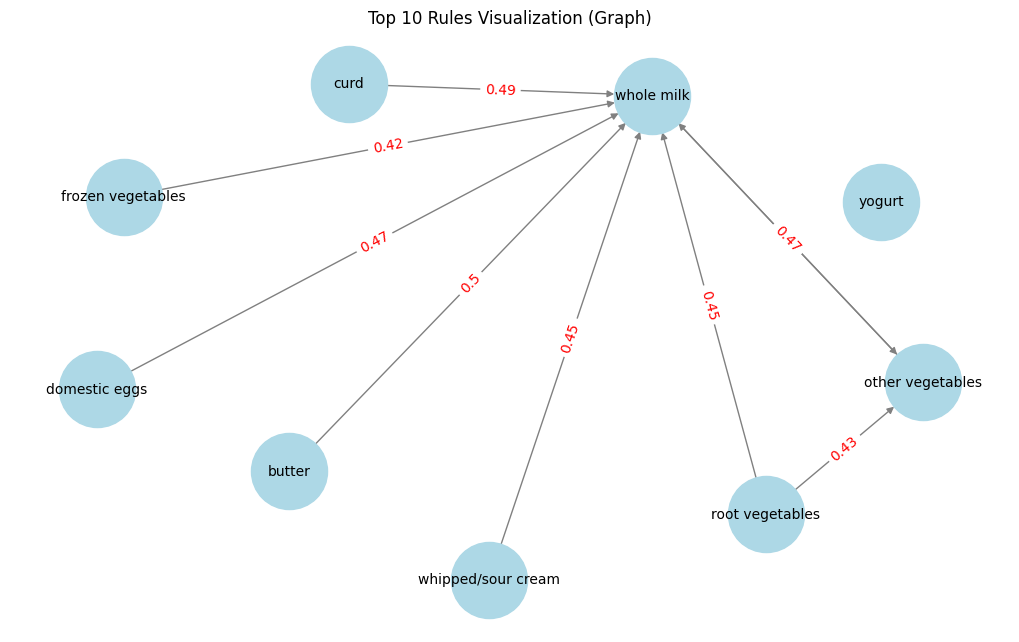

In [ ]:
plt.figure(figsize=(10, 6))
G = nx.DiGraph()

# Add nodes and edges for top 10 rules
for idx, rule in top10_rules.iterrows():
    for item in rule['antecedents']:
        G.add_node(item, label=item)
    for item in rule['consequents']:
        G.add_node(item, label=item)
    G.add_edge(list(rule['antecedents'])[0], list(rule['consequents'])[0], weight=rule['confidence'])

# Create a layout for the graph
pos = nx.spring_layout(G, k=2)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, node_size=3000, edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: round(v, 2) for k, v in labels.items()}, font_color='red')

# Show the plot
plt.title("Top 10 Rules Visualization (Graph)")
plt.show()